# Tutorial for working with the DESI MWS VAC DR1

Here we briefly demonstrate how to use the Milky Way Survey Value Added Catalogue for 
DESI Data Release 1.

Here we will use the combined file

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/mwsall-pix-iron.fits

the individual survey/program files: 
https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240520/rvpix-main-bright.fits

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/sp_output/240520/sppix-main-bright.fits


And individual exposures table
https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240521/rvpix_exp-sv3-bright.fits

And some individual files for stars in a given healpixel:

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240520/healpix/main/bright/108/10813/rvtab_coadd-main-bright-10813.fits

https://data.desi.lbl.gov/desi/science/mws/redux/dr1/v0.93/rv_output/240520/healpix/main/bright/108/10813/rvmod_coadd-main-bright-10813.fits




In [1]:
import astropy.table as atpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as maco

%matplotlib inline

# Main catalogue

Here we read the combined table that most of the infromation. 
This table consists from several extensions that contain different information

1) RVTAB extension: RVSpecfit pipeline
2) SPTAB extension: FERRE pipeline
3) GAIA extension: Gaia parameters
4) FIBERMAP extension: table of targeting information
5) SCORES extension: spectra quality columns



In [2]:
RV_T = atpy.Table().read('data/mwsall-pix-iron.fits',
                         'RVTAB',
                         mask_invalid=False)
SP_T = atpy.Table().read('data/mwsall-pix-iron.fits',
                         'SPTAB',
                         mask_invalid=False)
G_T = atpy.Table().read('data/mwsall-pix-iron.fits',
                        'GAIA',
                        mask_invalid=False)
FM_T = atpy.Table().read('data/mwsall-pix-iron.fits',
                         'FIBERMAP',
                         mask_invalid=False)
SC_T = atpy.Table().read('data/mwsall-pix-iron.fits',
                         'SCORES',
                         mask_invalid=False)

In [3]:
# Selecting sources that are
# are
# 1) primary (i.e. the best observation if the object was observed in more than one survey/program
# 2) have no RVS warning flags
# 3) are classified as star by redrock

main_sel = RV_T['PRIMARY'] & (RV_T['RVS_WARN'] == 0) & (RV_T['RR_SPECTYPE']
                                                        == 'STAR')

# Sky distribution

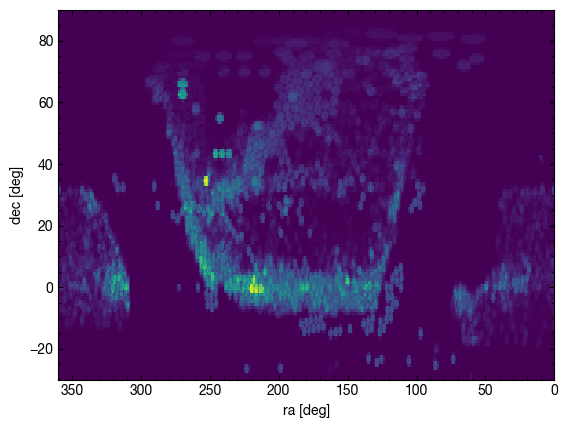

In [4]:
plt.hist2d(RV_T['TARGET_RA'][main_sel],
           RV_T['TARGET_DEC'][main_sel],
           bins=[360, 120],
           range=[[0, 360], [-30, 90]])
plt.xlabel('ra [deg]')
plt.xlim(360, 0)
plt.ylabel('dec [deg]');

# Multiple surveys/programs

The catalogue consists measurements from multiple surveys/programs.

The main survey with the most stars are survey main, program bright and backup.
But there are some stars observed in dark program as well.

In [5]:
# Colour-magnitude distribution by survey/program
print('surveys', np.unique(RV_T['SURVEY'][:]))
print('program', np.unique(RV_T['PROGRAM'][:]))

surveys  SURVEY
-------
    cmx
   main
special
    sv1
    sv2
    sv3
program PROGRAM
-------
 backup
 bright
   dark
  other


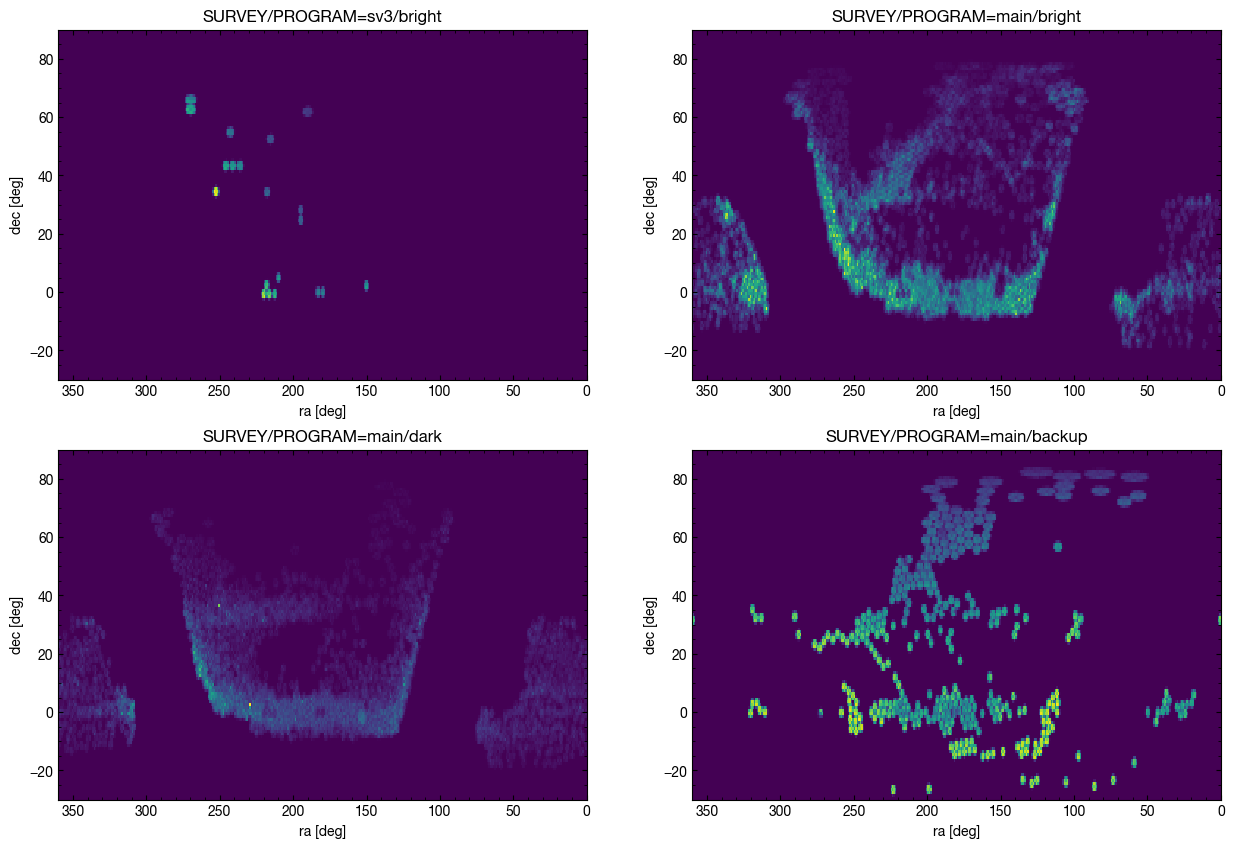

In [6]:
plt.figure(1, figsize=(15, 10))
cnt = 0
for survey, program in [('sv3', 'bright'), ('main', 'bright'),
                        ('main', 'dark'), ('main', 'backup')]:
    cur_sel = main_sel & (RV_T['SURVEY'] == survey) & (RV_T['PROGRAM']
                                                       == program)
    plt.subplot(2, 2, cnt + 1)
    plt.hist2d(RV_T['TARGET_RA'][cur_sel],
               RV_T['TARGET_DEC'][cur_sel],
               bins=[360, 120],
               range=[[0, 360], [-30, 90]])
    cnt += 1
    plt.title(f'SURVEY/PROGRAM={survey}/{program}')
    plt.xlabel('ra [deg]')
    plt.xlim(360, 0)
    plt.ylabel('dec [deg]');

# Photometry, targeting information

Photometry and targeting infromation is mostly in the FIBERMAP extension
Note that main/backup was not targeted using legacy survey, therefore it does not have those columns populated 

<TableColumns names=('TARGETID','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','MASKBITS','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','CMX_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','PLATE_RA','PLATE_DEC','COADD_NUMEXP','COADD_EXPTIME','COADD_NUMNIGHT','COADD_NUMTILE','MEAN_DELTA_X','RMS_DELTA_X','MEAN_DELTA_Y','RMS_DELTA_Y','MEAN_FIBER_RA','STD_FIBER_RA','MEAN_FIBER_DEC','STD_FIBER_DEC','MEAN_PSF_TO_FIBER_SPECFLUX','SCND_TARGET','SV1_DESI_TARGET','SV1_BGS_TARGET','SV1_MWS_TARGET','SV1_SCN

/tmp/ipykernel_568610/2720245394.py:8: RuntimeWarning: invalid value encountered in divide
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/2720245394.py:8: RuntimeWarning: invalid value encountered in log10
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/2720245394.py:9: RuntimeWarning: divide by zero encountered in log10
  22.5-2.5*np.log10(FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/2720245394.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/2720245394.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/2720245394.py:9: RuntimeWarning: invalid value encountered in log10
  22.5-2.5*np.log10(FM_T['FLUX_R'][cur_sel]),


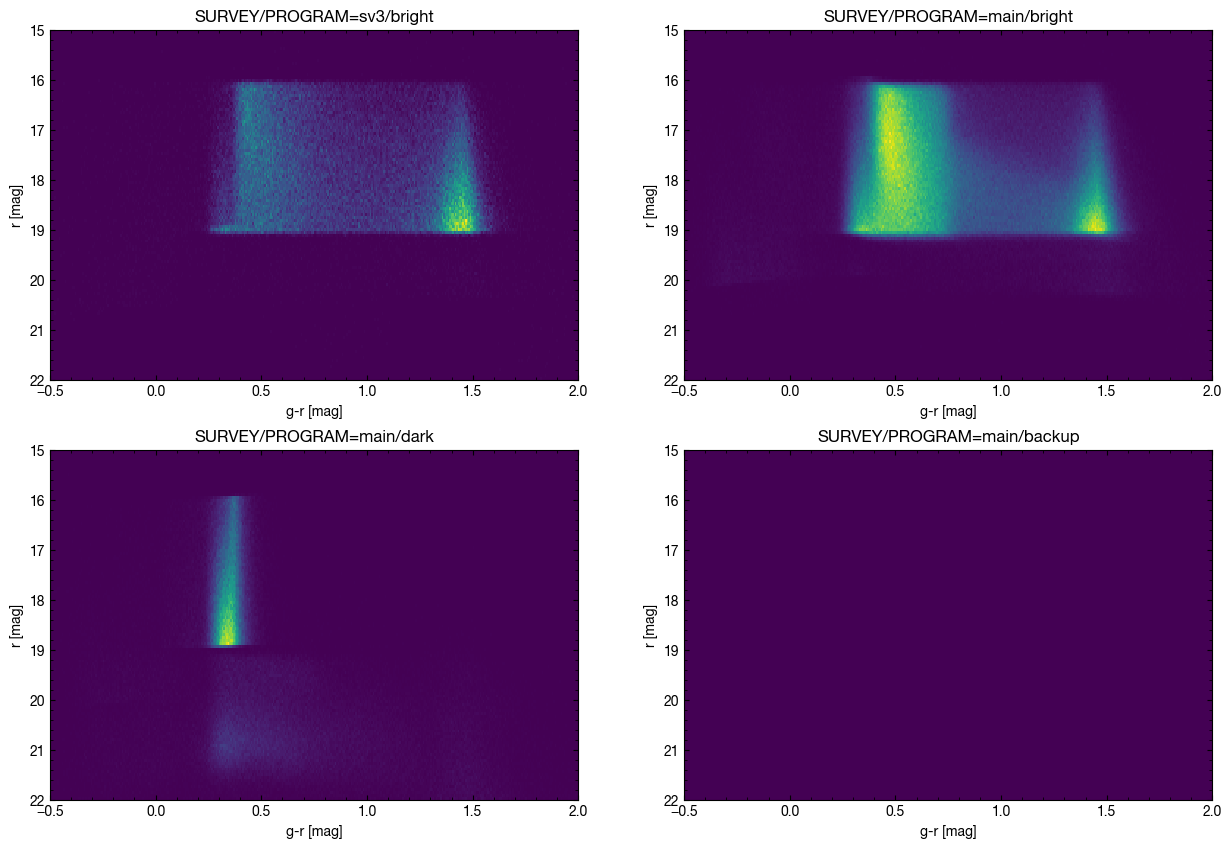

In [7]:
print(FM_T.columns)

plt.figure(1, figsize=(15, 10))
cnt = 0
for survey, program in [('sv3', 'bright'), ('main', 'bright'),
                        ('main', 'dark'), ('main', 'backup')]:
    cur_sel = main_sel & (RV_T['SURVEY'] == survey) & (RV_T['PROGRAM']
                                                       == program)
    plt.subplot(2, 2, cnt + 1)
    plt.hist2d(-2.5 *
               np.log10(FM_T['FLUX_G'][cur_sel] / FM_T['FLUX_R'][cur_sel]),
               22.5 - 2.5 * np.log10(FM_T['FLUX_R'][cur_sel]),
               bins=[360, 120],
               range=[[-0.5, 2], [15, 22]])
    cnt += 1
    plt.title(f'SURVEY/PROGRAM={survey}/{program}')
    plt.xlabel('g-r [mag]')
    plt.ylim(22, 15)
    plt.ylabel('r [mag]');

# The colour magnitude distribution for backup survey


<TableColumns names=('TARGETID','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','MASKBITS','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','CMX_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','PLATE_RA','PLATE_DEC','COADD_NUMEXP','COADD_EXPTIME','COADD_NUMNIGHT','COADD_NUMTILE','MEAN_DELTA_X','RMS_DELTA_X','MEAN_DELTA_Y','RMS_DELTA_Y','MEAN_FIBER_RA','STD_FIBER_RA','MEAN_FIBER_DEC','STD_FIBER_DEC','MEAN_PSF_TO_FIBER_SPECFLUX','SCND_TARGET','SV1_DESI_TARGET','SV1_BGS_TARGET','SV1_MWS_TARGET','SV1_SCN

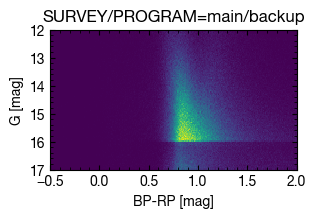

In [8]:
print(FM_T.columns)

plt.figure(1, figsize=(7, 4))
cnt = 0
for survey, program in [('main', 'backup')]:
    cur_sel = main_sel & (RV_T['SURVEY'] == survey) & (RV_T['PROGRAM']
                                                       == program)
    plt.subplot(2, 2, cnt + 1)
    plt.hist2d(G_T['PHOT_BP_MEAN_MAG'][cur_sel] -
               G_T['PHOT_RP_MEAN_MAG'][cur_sel],
               G_T['PHOT_G_MEAN_MAG'][cur_sel],
               bins=[360, 120],
               range=[[-0.5, 2], [12, 17]])
    cnt += 1
    plt.title(f'SURVEY/PROGRAM={survey}/{program}')
    plt.xlabel('BP-RP [mag]')
    plt.ylim(17, 12)
    plt.ylabel('G [mag]');

# Different types of targets 

The targeting information is contained in the DESI_TARGET, MWS_TARGET, BGS_TARGET, SCND_TARGET

The detailed information is elsewhere, but here we show the main MWS object types
(see 
https://github.com/desihub/desitarget/blob/main/py/desitarget/data/targetmask.yaml
also, Koposov et al 2024, Cooper et al 2023, Myers et al 2023)


    - [MWS_BROAD,           0, "Milky Way Survey magnitude limited bulk sample",         {obsconditions: BRIGHT}]
    - [MWS_WD,              1, "Milky Way Survey White Dwarf",                           {obsconditions: BRIGHT|DARK}]
    - [MWS_NEARBY,          2, "Milky Way Survey volume-complete ~100pc sample",         {obsconditions: BRIGHT}]
    #- 6: MWS BHBs
    - [MWS_BHB,             6, "Milky Way Survey Blue Horizontal Branch stars", {obsconditions: BRIGHT|DARK}]

    #- 8: Sub-classes of MWS_MAIN
    - [MWS_MAIN_BLUE,       8, "Milky Way Survey magnitude limited blue sample",              {obsconditions: BRIGHT}]
    - [MWS_MAIN_RED,        11, "Milky Way Survey magnitude limited red sample",              {obsconditions: BRIGHT}]

    # ADM Standard stars based only on Gaia.
    - [GAIA_STD_FAINT,      33, "Standard stars for dark/gray conditions",   {obsconditions: DARK|BACKUP|TWILIGHT12|TWILIGHT18}]
    - [GAIA_STD_WD,         34, "White Dwarf stars",                         {obsconditions: DARK|BRIGHT|BACKUP|TWILIGHT12|TWILIGHT18}]
    - [GAIA_STD_BRIGHT,     35, "Standard stars for BRIGHT conditions",      {obsconditions: BRIGHT|BACKUP|TWILIGHT12|TWILIGHT18}]

/tmp/ipykernel_568610/4202707082.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/4202707082.py:10: RuntimeWarning: invalid value encountered in divide
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/4202707082.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/4202707082.py:11: RuntimeWarning: divide by zero encountered in log10
  22.5-2.5*np.log10(FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/4202707082.py:11: RuntimeWarning: invalid value encountered in log10
  22.5-2.5*np.log10(FM_T['FLUX_R'][cur_sel]),
/tmp/ipykernel_568610/4202707082.py:10: RuntimeWarning: invalid value encountered in log10
  plt.hist2d(-2.5*np.log10(FM_T['FLUX_G'][cur_sel]/FM_T['FLUX_R'][cur_sel]),


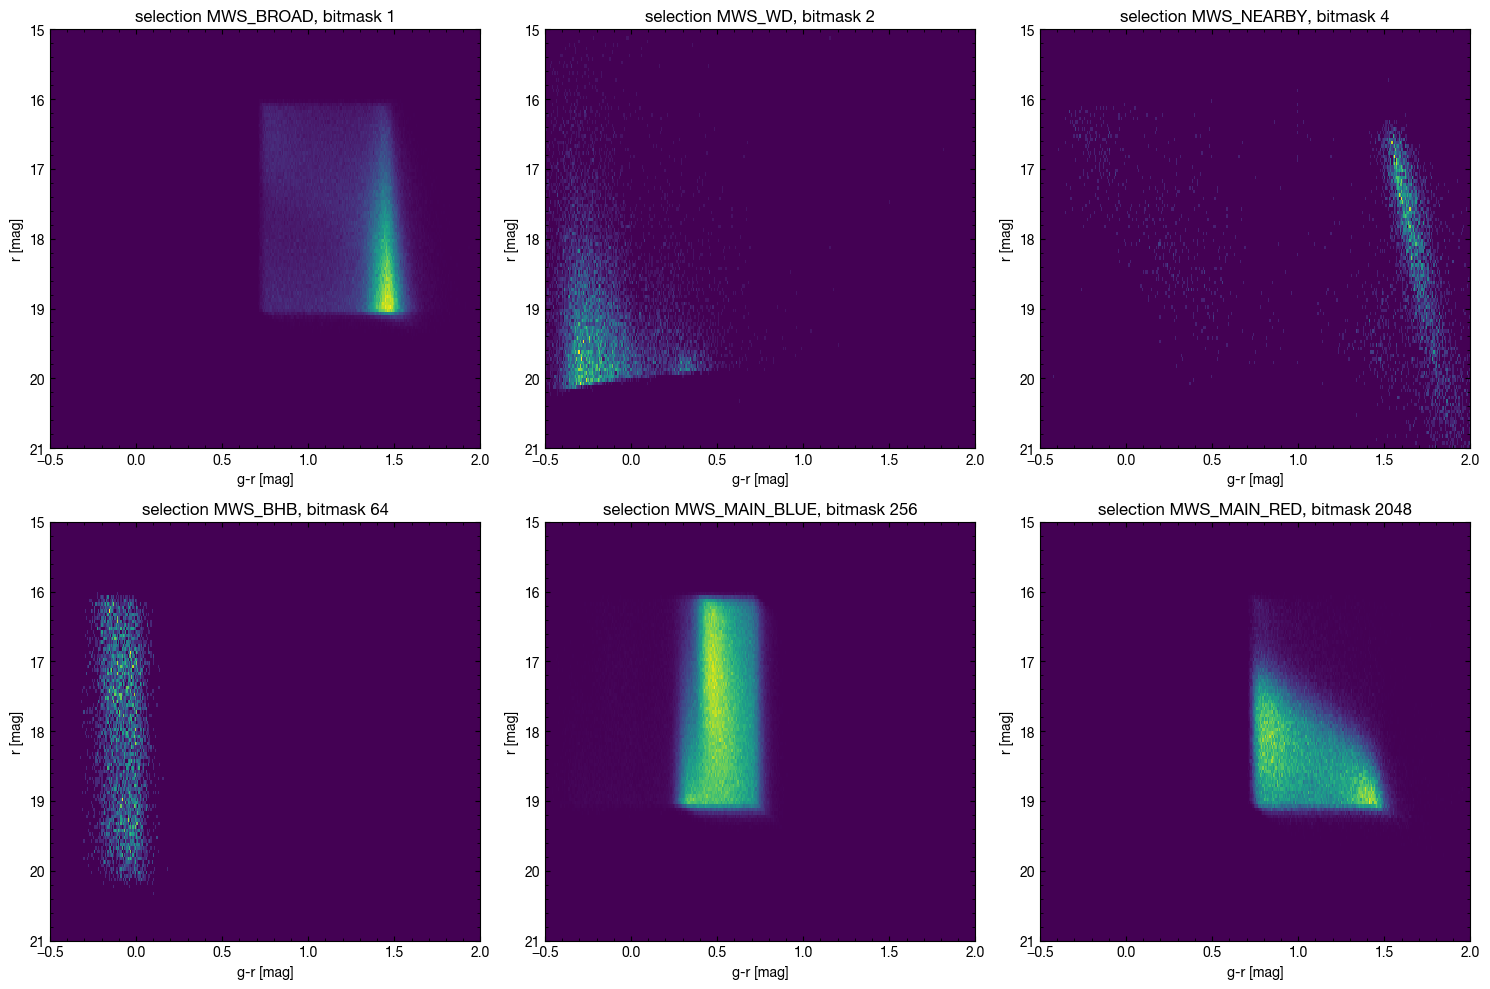

In [9]:
plt.figure(1, figsize=(15, 10))
cnt = 0
bitmasks = {
    'MWS_BROAD': 0,
    'MWS_WD': 1,
    'MWS_NEARBY': 2,
    'MWS_BHB': 6,
    'MWS_MAIN_BLUE': 8,
    'MWS_MAIN_RED': 11
}
survey, program = ('main', 'bright')

for curt, bit in bitmasks.items():
    objtype_sel = (FM_T['MWS_TARGET'] & (2**bit)) > 0
    cur_sel = objtype_sel & main_sel & (RV_T['SURVEY'] == survey) & (
        RV_T['PROGRAM'] == program)
    plt.subplot(2, 3, cnt + 1)
    plt.hist2d(-2.5 *
               np.log10(FM_T['FLUX_G'][cur_sel] / FM_T['FLUX_R'][cur_sel]),
               22.5 - 2.5 * np.log10(FM_T['FLUX_R'][cur_sel]),
               bins=[360, 120],
               range=[[-0.5, 2], [15, 21]])
    cnt += 1
    plt.title(f'selection {curt}, bitmask {2**bit}')
    plt.xlabel('g-r [mag]')
    plt.ylim(21, 15)
    plt.ylabel('r [mag]')
plt.tight_layout()

# Stellar parameters

Here we look at surface gravity, temperature for in the main/bright survey. 
We select signal to noise higher than 10 in the R arm.

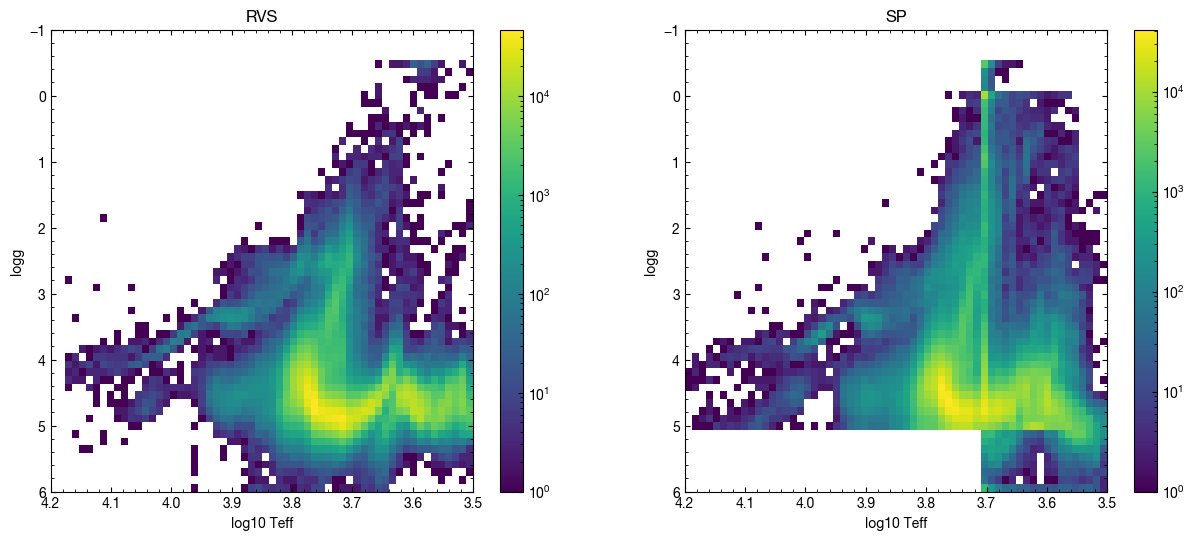

In [10]:
import matplotlib.colors as maco

cur_sel = main_sel & (RV_T['SURVEY'] == 'main') & (
    RV_T['PROGRAM'] == 'bright') & (RV_T['SN_R'] > 10)
plt.figure(1, figsize=(15, 6))
plt.subplot(121)
plt.hist2d(np.log10(RV_T['TEFF'][cur_sel]),
           RV_T['LOGG'][cur_sel],
           range=[[3.5, 4.2], [-1, 6]],
           bins=[60, 60],
           norm=maco.LogNorm())
plt.xlim(4.2, 3.5)
plt.ylim(6, -1)
plt.xlabel('log10 Teff')
plt.ylabel('logg')
plt.title('RVS')
plt.colorbar()

plt.subplot(122)
cur_sel = main_sel & (RV_T['SURVEY'] == 'main') & (
    RV_T['PROGRAM'] == 'bright') & (SP_T['SUCCESS'] == 1)
plt.hist2d(np.log10(SP_T['TEFF'][cur_sel]),
           SP_T['LOGG'][cur_sel],
           range=[[3.5, 4.2], [-1, 6]],
           bins=[60, 60],
           norm=maco.LogNorm())
plt.xlim(4.2, 3.5)
plt.ylim(6, -1)
plt.xlabel('log10 Teff')
plt.ylabel('logg')
plt.title('SP')
plt.colorbar()

# Abundances 

[Fe/H] and [a/Fe] distribution

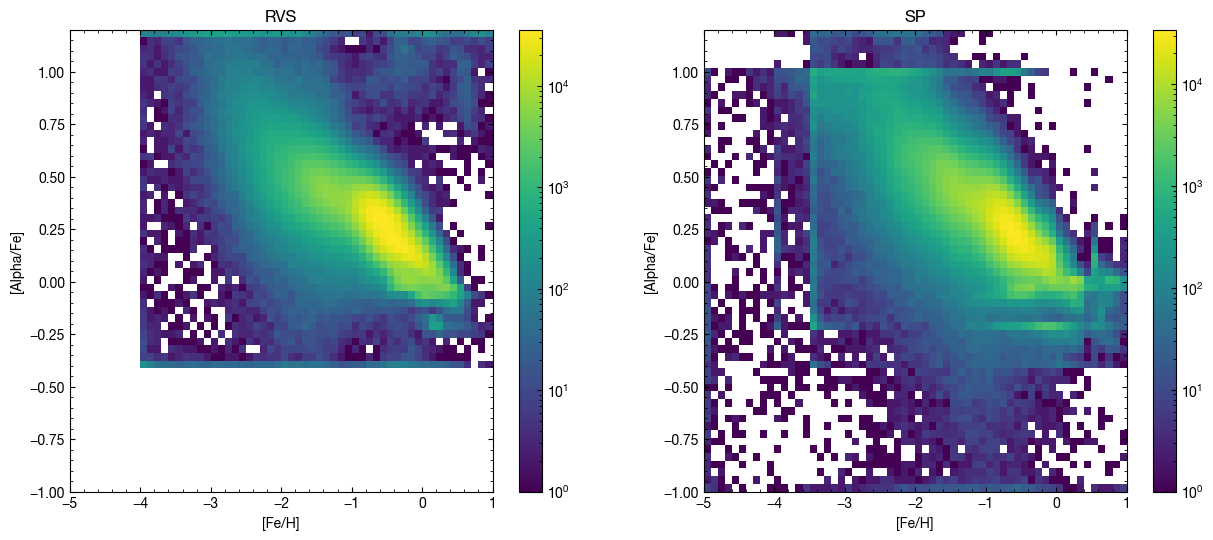

In [11]:
cur_sel = main_sel & (RV_T['SURVEY'] == 'main') & (
    RV_T['PROGRAM'] == 'bright') & (RV_T['SN_R'] > 10)
plt.figure(1, figsize=(15, 6))
plt.subplot(121)
plt.hist2d(RV_T['FEH'][cur_sel],
           RV_T['ALPHAFE'][cur_sel],
           range=[[-5, 1], [-1, 1.2]],
           bins=[60, 60],
           norm=maco.LogNorm())
plt.xlabel('[Fe/H]')
plt.ylabel('[Alpha/Fe]')
plt.title('RVS')
plt.colorbar()

plt.subplot(122)
cur_sel = main_sel & (RV_T['SURVEY'] == 'main') & (
    RV_T['PROGRAM'] == 'bright') & (SP_T['SUCCESS'] == 1)
plt.hist2d(SP_T['FEH'][cur_sel],
           SP_T['ALPHAFE'][cur_sel],
           range=[[-5, 1], [-1, 1.2]],
           bins=[60, 60],
           norm=maco.LogNorm())
plt.xlabel('[Fe/H]')
plt.ylabel('[Alpha/Fe]')
plt.title('SP')
plt.colorbar()

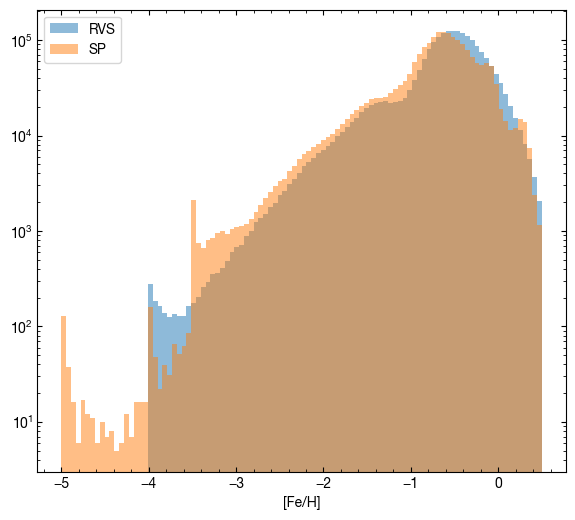

In [12]:
cur_sel = main_sel & (RV_T['SURVEY'] == 'main') & (
    RV_T['PROGRAM'] == 'bright') & (RV_T['SN_R'] > 10)
plt.figure(1, figsize=(15, 6))
plt.subplot(121)
plt.hist(RV_T['FEH'][cur_sel], range=[-5, .5], label='RVS', alpha=.5, bins=100)
plt.xlabel('[Fe/H]')
plt.hist(SP_T['FEH'][cur_sel], range=[-5, .5], label='SP', alpha=.5, bins=100)
plt.gca().set_yscale('log')
plt.legend()